In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style

from path import Path
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, classification_report, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, balanced_accuracy_score
from sklearn.tree import DecisionTreeRegressor

In [2]:
# path to dataset
file_path = Path("/Users/Emily/documents/class_data/final_group_airbnb/Resources/cleaned_airbnb_dataset4.csv")
airbnb_df = pd.read_csv(file_path, index_col=0)
airbnb_df.head()

,host_id,host_is_superhost,property_type,room_type,neighborhood,zipcode,accommodates,bedrooms,bathrooms,minimum_nights,...,latitude,longitude,reviews,review_scores_rating,price,cleaning_fee,total,Median,Mean,Pop
room_id,,,,,,,,,,,,,,,,,,,,,
958,1169,t,Apartment,Entire home/apt,Western Addition,94117,3,1.0,1.0,1,...,37.76931,-122.43386,217,97.0,170.0,100.0,270.0,84802.0,112291.0,39169.0
3850,4921,t,House,Private room,Inner Sunset,94131,2,1.0,1.0,1,...,37.75402,-122.45805,160,94.0,99.0,10.0,109.0,97834.0,126303.0,26881.0
5858,8904,f,Apartment,Entire home/apt,Bernal Heights,94110,5,2.0,1.0,30,...,37.74511,-122.42102,111,98.0,235.0,100.0,335.0,75106.0,98470.0,69333.0
7918,21994,t,Apartment,Private room,Haight Ashbury,94117,2,1.0,4.0,32,...,37.76669,-122.45250,18,86.0,65.0,50.0,115.0,84802.0,112291.0,39169.0
8142,21994,t,Apartment,Private room,Haight Ashbury,94117,2,1.0,4.0,32,...,37.76487,-122.45183,8,93.0,65.0,50.0,115.0,84802.0,112291.0,39169.0


In [19]:
# dropping categorical data
num_airbnb_df = airbnb_df.drop(['maximum_nights','reviews','cleaning_fee','total','Median','Mean','Pop','host_id','host_is_superhost','property_type','room_type',
                                'neighborhood','latitude','longitude','zipcode'], axis=1)

In [20]:
num_airbnb_df.head()

,accommodates,bedrooms,bathrooms,minimum_nights,review_scores_rating,price
room_id,,,,,,
958,3,1.0,1.0,1,97.0,170.0
3850,2,1.0,1.0,1,94.0,99.0
5858,5,2.0,1.0,30,98.0,235.0
7918,2,1.0,4.0,32,86.0,65.0
8142,2,1.0,4.0,32,93.0,65.0


In [21]:
le = LabelEncoder()
num_airbnb_df['accommodates'] = le.fit_transform(num_airbnb_df['accommodates'])
num_airbnb_df['bedrooms'] = le.fit_transform(num_airbnb_df['bedrooms'])
num_airbnb_df['bathrooms'] = le.fit_transform(num_airbnb_df['bathrooms'])
num_airbnb_df['minimum_nights'] = le.fit_transform(num_airbnb_df['minimum_nights'])
num_airbnb_df['review_scores_rating'] = le.fit_transform(num_airbnb_df['review_scores_rating'])
num_airbnb_df['price'] = le.fit_transform(num_airbnb_df['price'])


Selected Features

In [24]:
feat2 = ['accommodates','bedrooms','bathrooms','minimum_nights','review_scores_rating']
X = num_airbnb_df[feat2]
Y = num_airbnb_df.price
X.head()

,accommodates,bedrooms,bathrooms,minimum_nights,review_scores_rating
room_id,,,,,
958,2,1,2,0,41
3850,1,1,2,0,38
5858,4,2,2,21,42
7918,1,1,8,23,30
8142,1,1,8,23,37


In [25]:
X_train, X_pred, Y_train, Y_pred = train_test_split(X, Y, random_state = 42)

In [26]:
print("Training set: X train:{} Y train:{}".format(X_train.shape, Y_train.shape))
print("Prediction set: X pred:{} Y pred:{}".format(X_pred.shape, Y_pred.shape))
print("Full dataset: X:{} Y:{}".format(X.shape, Y.shape))

Training set: X train:(5861, 5) Y train:(5861,)
Prediction set: X pred:(1954, 5) Y pred:(1954,)
Full dataset: X:(7815, 5) Y:(7815,)


In [27]:
num_airbnb_df = DecisionTreeRegressor(random_state = 42)
num_airbnb_df.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

In [28]:
X_train.head()

,accommodates,bedrooms,bathrooms,minimum_nights,review_scores_rating
room_id,,,,,
51773,0,1,0,21,36
32727287,5,1,2,0,40
1759087,1,1,2,1,40
11795676,1,1,2,21,42
34514224,1,1,2,1,44


In [29]:
num_airbnb_df.predict(X_train.head())

array([ 20.5       , 137.        , 112.73076923, 123.08571429,
       152.17647059])

Random Forest

In [30]:
encode_X_train = X_train.copy()
encode_X_pred = X_pred.copy()

rf_airbnb_model = RandomForestRegressor(n_estimators = 250, random_state = 42)
rf_airbnb_model.fit(encode_X_train, Y_train)

RandomForestRegressor(n_estimators=250, random_state=42)

In [31]:
predict_total = rf_airbnb_model.predict(encode_X_pred)
mean_absolute_error(Y_pred, predict_total)

56.229368205464446

In [32]:
mean_squared_error(Y_pred, predict_total, squared=False)

77.72269005955751

In [33]:
mean_squared_error(Y_pred, predict_total)

6040.8165500940395

Correlation Matrix

In [34]:
file_path = Path("/Users/Emily/documents/class_data/final_group_airbnb/Resources/listings.csv")
original_df = pd.read_csv(file_path, index_col=0)
original_df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
958,https://www.airbnb.com/rooms/958,2.020000e+13,10/14/2019,"Bright, Modern Garden Unit - 1BR/1B",New update: the house next door is under const...,"Newly remodeled, modern, and bright garden uni...",New update: the house next door is under const...,none,*Quiet cul de sac in friendly neighborhood *St...,Due to the fact that we have children and a do...,...,f,f,moderate,f,f,1,1,0,0,1.74
3850,https://www.airbnb.com/rooms/3850,2.020000e+13,10/14/2019,Charming room for two,Your own private room plus access to a shared ...,This room can fit two people. Nobody else will...,Your own private room plus access to a shared ...,none,"This is a quiet, safe neighborhood on a substa...",House Rule footnotes: 1.\tI don’t allow check ...,...,f,f,strict_14_with_grace_period,f,f,3,0,3,0,1.28
5858,https://www.airbnb.com/rooms/5858,2.020000e+13,10/14/2019,Creative Sanctuary,NaN,We live in a large Victorian house on a quiet ...,We live in a large Victorian house on a quiet ...,none,I love how our neighborhood feels quiet but is...,All the furniture in the house was handmade so...,...,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.87
7918,https://www.airbnb.com/rooms/7918,2.020000e+13,10/14/2019,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,"Shopping old town, restaurants, McDonald, Whol...",Wi-Fi signal in common areas. Large eat in k...,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.15
8142,https://www.airbnb.com/rooms/8142,2.020000e+13,10/14/2019,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,"Settle down, S.F. resident, student, hospital,...",Nice and good public transportation. 7 minute...,none,NaN,Wi-Fi signal in common areas. Large eat in k...,...,f,f,strict_14_with_grace_period,f,f,9,0,9,0,0.13


In [ ]:
# heatmap
cmx2 = original_df.corr()
cmx2 = abs(cmx2)
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(cmx2, vmax=0.8, vmin=0.05, annot=True)

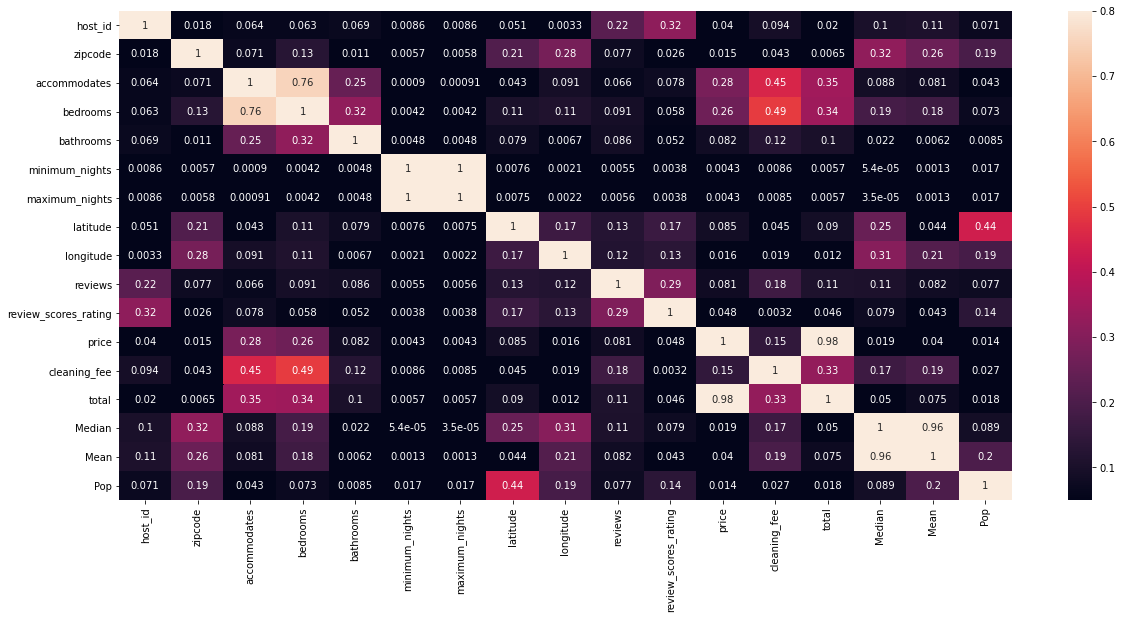

In [18]:
# heatmap
cmx = airbnb_df.corr()
cmx = abs(cmx)
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(cmx, vmax=0.8, vmin=0.05, annot=True)